In [1]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import dataframe_image as dfi
from scipy import stats
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('Final_data.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
0,12/31/2019,488,14.0,36.1,17.30,50.409836,486.45,Alabama
1,12/31/2019,824,10.9,36.1,23.00,50.970874,810.11,Arizona
2,12/31/2019,193,13.6,37.4,15.60,55.958549,192.48,Arkansas
3,12/31/2019,5566,10.1,26.2,12.25,51.257636,5558.86,California
4,12/31/2019,545,7.0,23.8,17.20,47.339450,538.54,Colorado


In [3]:
df.sort_values(by=['Year'], inplace=True, ascending=True)
df = df.loc[df['State']=='Michigan']
df

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
1172,12/31/1995,692,7.6,17.20,1.4,45.809249,686.56,Michigan
1124,12/31/1996,641,7.5,18.10,1.4,45.553822,635.74,Michigan
1076,12/31/1997,662,7.4,19.10,1.4,45.166163,658.86,Michigan
1028,12/31/1998,648,7.4,20.10,1.4,44.598765,645.70,Michigan
980,12/31/1999,775,7.3,21.10,1.4,47.225806,771.56,Michigan
932,12/31/2000,635,7.3,22.10,2.0,44.724409,634.13,Michigan
884,12/31/2001,731,7.5,23.13,2.1,44.733242,728.16,Michigan
836,12/31/2002,771,7.7,24.17,2.5,46.044099,769.10,Michigan
788,12/31/2003,799,7.9,25.20,2.8,44.055069,796.97,Michigan
740,12/31/2004,1031,7.8,25.30,3.9,47.332687,1029.55,Michigan


In [4]:
df_output = df.tail(1)
lastyear_df = df_output.drop(columns=['Year', 'Waitlist','Diabetes','Obesity','Overdose','Pct_O','State'])
lastyear_df = lastyear_df.reset_index(drop=True)
lastyear_df

,Total_Adj
0,923.74


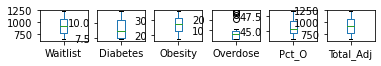

In [5]:
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
plt.show()

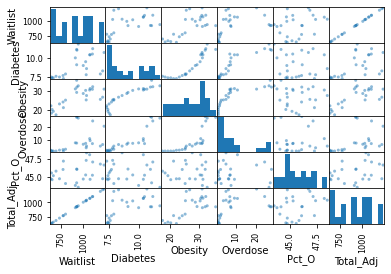

In [6]:
# scatter plot matrix
pd.plotting.scatter_matrix(df)
plt.show()

In [7]:
#Describe data
df.describe()

,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,922.280000,8.996000,26.956000,8.800000,45.622743,921.328000
std,189.230794,1.513407,5.240537,8.916931,1.338328,190.590925
min,635.000000,7.300000,17.200000,1.400000,43.524416,634.130000
25%,771.000000,7.600000,23.130000,2.100000,44.689379,769.100000
50%,927.000000,8.600000,27.700000,6.400000,45.268293,928.210000
75%,1070.000000,10.400000,31.200000,9.400000,46.672078,1068.190000
max,1232.000000,11.800000,36.000000,27.800000,48.405797,1231.770000


In [8]:
#Correlation Matrix
corr_matrix = df[["Diabetes", "Obesity", "Overdose", "Pct_O"]].corr()
print(corr_matrix)

          Diabetes   Obesity  Overdose     Pct_O
Diabetes  1.000000  0.911341  0.885671 -0.077463
Obesity   0.911341  1.000000  0.788963 -0.060912
Overdose  0.885671  0.788963  1.000000 -0.052038
Pct_O    -0.077463 -0.060912 -0.052038  1.000000


In [9]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(25, 4) (25, 1)


In [10]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#Create model
model = LinearRegression()

In [12]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.7689890516736034
Testing Score: 0.011614836524840189


Text(0.5, 1.0, 'Residual Plot')

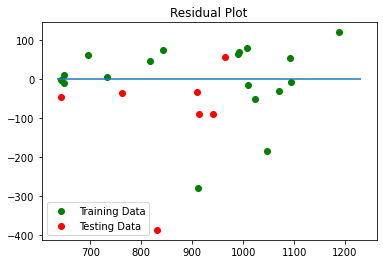

In [13]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#End

In [14]:
#R2 of original model
r_sq = model.score(X, y)
print('coefficient of determination', r_sq)

coefficient of determination 0.6179930564614271


In [15]:
print(model.intercept_)

[-2802.2444258]


In [16]:
print(model.coef_)

[[44.05325521 27.63143277 -8.82964079 57.76093239]]


In [17]:
#Make a Prediction using model
predictedTotal_Adj = model.predict([[10.77,32,19.9,49]])
print(predictedTotal_Adj)

[[1210.99081678]]


In [18]:
print(X_train.shape)

(18, 4)


In [19]:
print(y_train.shape)

(18, 1)


In [20]:
print(y_test.shape)

(7, 1)


In [21]:
print(X_test.shape)

(7, 4)


In [22]:
modeldetail = sm.OLS(y, X)
resultstest = modeldetail.fit()

In [23]:
print(X.shape)

(25, 4)


In [24]:
print(y.shape)

(25, 1)


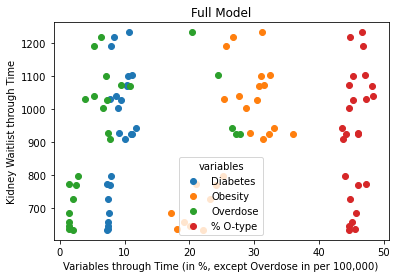

In [25]:
plt.scatter(X[('Diabetes')], y, label='Diabetes')
plt.scatter(X[('Obesity')], y, label='Obesity')
plt.scatter(X[('Overdose')], y, label='Overdose')
plt.scatter(X[('Pct_O')], y, label='% O-type')
plt.title('Full Model')
plt.xlabel('Variables through Time (in %, except Overdose in per 100,000)')
plt.ylabel('Kidney Waitlist through Time')
plt.legend(title='variables',loc='lower center')
plt.savefig('images/Michigan_full.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)
plt.show()

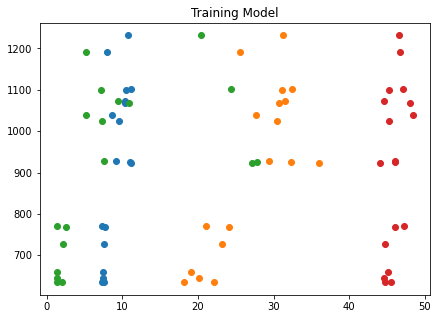

In [26]:
fig = plt.figure()
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.title('Training Model')
fig.set_size_inches(7,5)
plt.show()

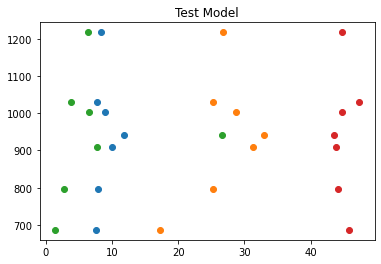

In [27]:
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

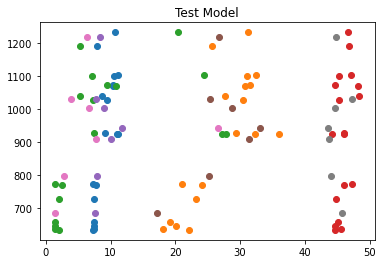

In [28]:
plt.scatter(X_train[('Diabetes')], y_train)
plt.scatter(X_train[('Obesity')], y_train)
plt.scatter(X_train[('Overdose')], y_train)
plt.scatter(X_train[('Pct_O')], y_train)
plt.scatter(X_test[('Diabetes')], y_test)
plt.scatter(X_test[('Obesity')], y_test)
plt.scatter(X_test[('Overdose')], y_test)
plt.scatter(X_test[('Pct_O')], y_test)
plt.title('Test Model')
plt.show()

In [29]:
model_lin = sm.OLS.from_formula("Total_Adj ~ Diabetes + Obesity + Overdose + Pct_O", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Total_Adj   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     9.383
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           0.000194
Time:                        19:32:51   Log-Likelihood:                -153.01
No. Observations:                  25   AIC:                             316.0
Df Residuals:                      20   BIC:                             322.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2229.7228    924.210     -2.413      0.026   -4157.592    -301.854
Diabetes      -2.1953     53.732     -0.041      0.968    -114.278     109.888
Obesity       35.4168     11.705      3.026      0.007      11.000      59.833
Overdose      -6.3204      6.101     -1.036      0.313     -19.047       6.406
Pct_O         49.7937     18.851      2.641      0.016      10.472      89.116
==============================================================================
Omnibus:                       12.058   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.567
Skew:                           1.375   Prob(JB):                      0.00507
Kurtosis:                       4.608   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
df


,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj,State
1172,12/31/1995,692,7.6,17.20,1.4,45.809249,686.56,Michigan
1124,12/31/1996,641,7.5,18.10,1.4,45.553822,635.74,Michigan
1076,12/31/1997,662,7.4,19.10,1.4,45.166163,658.86,Michigan
1028,12/31/1998,648,7.4,20.10,1.4,44.598765,645.70,Michigan
980,12/31/1999,775,7.3,21.10,1.4,47.225806,771.56,Michigan
932,12/31/2000,635,7.3,22.10,2.0,44.724409,634.13,Michigan
884,12/31/2001,731,7.5,23.13,2.1,44.733242,728.16,Michigan
836,12/31/2002,771,7.7,24.17,2.5,46.044099,769.10,Michigan
788,12/31/2003,799,7.9,25.20,2.8,44.055069,796.97,Michigan
740,12/31/2004,1031,7.8,25.30,3.9,47.332687,1029.55,Michigan


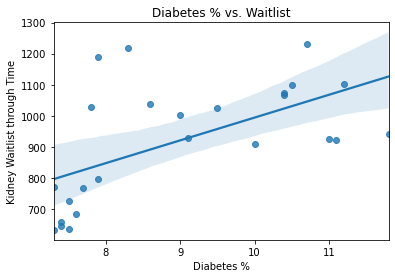

In [31]:
sns.regplot(X[('Diabetes')],y)
plt.title('Diabetes % vs. Waitlist')
plt.xlabel('Diabetes %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Michigan_diabetes.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

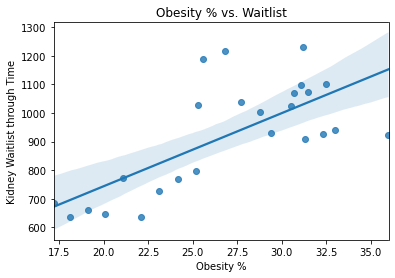

In [32]:
sns.regplot(X[('Obesity')],y)
plt.title('Obesity % vs. Waitlist')
plt.xlabel('Obesity %')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Michigan_obesity.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

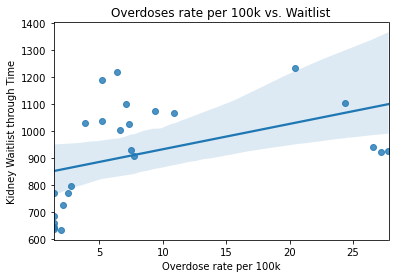

In [33]:
sns.regplot(X[('Overdose')],y)
plt.xlabel('Overdose rate per 100k')
plt.title('Overdoses rate per 100k vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Michigan_overdose.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

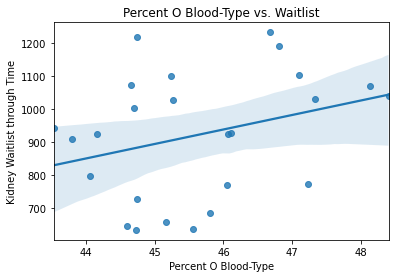

In [34]:
sns.regplot(X[('Pct_O')],y)
plt.xlabel('Percent O Blood-Type')
plt.title('Percent O Blood-Type vs. Waitlist')
plt.ylabel('Kidney Waitlist through Time')
plt.savefig('images/Michigan_pct_O.png', dpi=100, facecolor='w', edgecolor='w',
        orientation='portrait', format=None,
        transparent=False, bbox_inches=None, pad_inches=0.2, metadata=None)

<AxesSubplot:xlabel='Pct_O'>

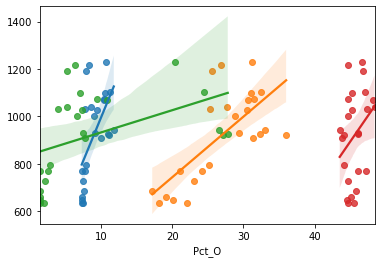

In [35]:
sns.regplot(X[('Diabetes')],y)
sns.regplot(X[('Obesity')],y)
sns.regplot(X[('Overdose')],y)
sns.regplot(X[('Pct_O')],y)

In [36]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients_transposed = coefficients.T
coefficients_transposed
coefficients_final = coefficients_transposed[1:]
coefficients_final

,0,1,2,3
0,44.0533,27.6314,-8.82964,57.7609


In [37]:
test_df = pd.DataFrame([[r_sq,training_score,testing_score,model.intercept_ ,predictedTotal_Adj]])
test_df

,0,1,2,3,4
0,0.617993,0.768989,0.011615,[-2802.244425801283],[[1210.990816782155]]


In [38]:
#dfi.export(test_df, 'test_df.png')

In [39]:
summary_df = pd.concat([test_df, lastyear_df, coefficients_final], axis=1)
summary_df.columns = ['R2','Training Score', 'Test Score', 'Intercept','Forecast based on Natl Avg','Last Waitlist','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O']

In [40]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.617993,0.768989,0.011615,[-2802.244425801283],[[1210.990816782155]],923.74,44.0533,27.6314,-8.82964,57.7609


In [41]:
summary_df.dtypes

R2                            float64
Training Score                float64
Test Score                    float64
Intercept                      object
Forecast based on Natl Avg     object
Last Waitlist                 float64
Coef_Diabetes                  object
Coef_Obesity                   object
Coef_Overdose                  object
Coef_Pct_O                     object
dtype: object

In [42]:
summary_df

,R2,Training Score,Test Score,Intercept,Forecast based on Natl Avg,Last Waitlist,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O
0,0.617993,0.768989,0.011615,[-2802.244425801283],[[1210.990816782155]],923.74,44.0533,27.6314,-8.82964,57.7609


In [43]:
summary_df['Intercept'] = summary_df['Intercept'].astype(int)
summary_df['Forecast based on Natl Avg'] = summary_df['Forecast based on Natl Avg'].astype(int)
summary_df['R2'] = summary_df['R2'].round(decimals=4)
summary_df['Training Score'] = summary_df['Training Score'].round(decimals=4)
summary_df['Test Score'] = summary_df['Test Score'].round(decimals=4)
summary_df = summary_df[['R2','Training Score','Test Score','Intercept','Coef_Diabetes','Coef_Obesity','Coef_Overdose','Coef_Pct_O','Last Waitlist','Forecast based on Natl Avg']]
dfi.export(summary_df, 'images/Michigan_summary.png')

In [44]:
summary_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.618,0.769,0.0116,-2802,44.0533,27.6314,-8.82964,57.7609,923.74,1210


In [270]:
summaryalt_df = summary_df.style.set_properties(**{'background-color': 'black','color': 'lawngreen','border-color': 'white'})
summaryalt_df

,R2,Training Score,Test Score,Intercept,Coef_Diabetes,Coef_Obesity,Coef_Overdose,Coef_Pct_O,Last Waitlist,Forecast based on Natl Avg
0,0.943700,0.969800,0.837600,259,-43.269983,37.556151,12.557919,-3.661461,1089.440000,1066
